# Import

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
print("Complete")

Complete


# Input

In [277]:
filePathDataEval = str(input('File path of evaluation file (*.csv): '))
filePathDataTrain = str(input('File path of trainning file (*.json): '))
nTopQAPair = int(input('# of top QA pairs: '))

File path of evaluation file (*.csv):  C:\Users\nguyen.tt1\Downloads\eval.csv
File path of trainning file (*.json):  C:\Users\nguyen.tt1\Documents\Nanibot_ZaloAIChallenge2019_VietnameseWikiQA\Dataset\train.json
# of top QA pairs:  7


In [278]:
evalData = pd.read_csv(filePathDataEval, encoding="utf8")
trainData = pd.read_json(filePathDataTrain, encoding='utf8')

In [279]:
evalData.insert(
    len(evalData.columns),
    'IsCorrect',
    ~(evalData['prediction'] ^ evalData['label'])
)

# Utilities

In [280]:
def plotConfusionMatrix(cm, normalize=False):
    cmap = plt.get_cmap('rainbow')

    plt.imshow(cm,cmap=cmap)
    plt.colorbar()
    plt.xticks([0,1],['True','False'])
    plt.yticks([0,1],['True','False'])
    
    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
    
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}%\n".format(cm[i, j]*100),
                    ha="center",
                    va="center",
                    size='large',
                    color="black",
                    weight="bold"
            )
        else:
            plt.text(j, i, "{:,}\n".format(cm[i, j]),
                    ha="center",
                    va="center",
                    size='large',
                    color="black",
                    weight="bold"
            )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if normalize:
        plt.title("Confusion matrix - Normalized\n\n")
    else:
        plt.title("Confusion matrix\n\n")
    plt.show()

In [281]:
def getTopQAPair(nQAPair, useCorrectPrediction=True,sortAsc=True):
    if (useCorrectPrediction):
        topQA = evalData[
            evalData['IsCorrect']
        ].sort_values(by=['probabilities'], ascending=sortAsc).iloc[:nQAPair][['guid','prediction','probabilities']]
    else:
        topQA = evalData[
            ~evalData['IsCorrect']
        ].sort_values(by=['probabilities'], ascending=sortAsc).iloc[:nQAPair][['guid','prediction','probabilities']]

    return pd.merge(
        right=trainData,
        left=topQA,
        right_on='id',
        left_on='guid'
    )[['id','question','title','text','label','prediction','probabilities']]

# Confusion Matrix

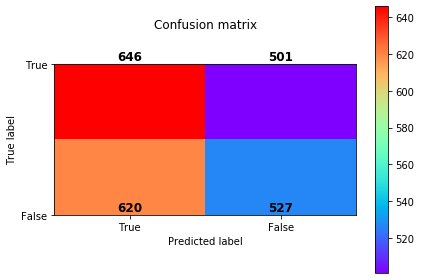

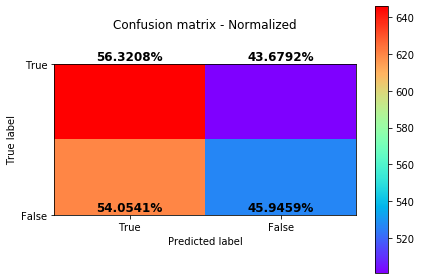

Classification report

              precision    recall  f1-score   support

       False       0.51      0.56      0.54      1147
        True       0.51      0.46      0.48      1147

    accuracy                           0.51      2294
   macro avg       0.51      0.51      0.51      2294
weighted avg       0.51      0.51      0.51      2294



In [282]:
plotConfusionMatrix(
    confusion_matrix(
            evalData['label'],
            evalData['prediction']
    )
)
plotConfusionMatrix(
    confusion_matrix(
            evalData['label'],
            evalData['prediction']
    ),
    normalize=True
)
print("Classification report\n")
print(classification_report(
    evalData['label'],
    evalData['prediction']
))

# Top x QA pairs with the most confidence & correct

In [283]:
getTopQAPair(nTopQAPair, useCorrectPrediction=True, sortAsc=False)

,id,question,title,text,label,prediction,probabilities
0,u3-1567767282_0,the love of siam là gì,The Love of Siam,"Rak Hang Siam ( tiếng Thái : รักแห่งสยาม , Lat...",True,True,0.552078
1,u8-1557307047_1,Đội tuyển bóng đá Ý vô địch lần đầu tiên vào n...,Đội tuyển bóng đá quốc gia Ý,"Đội tuyển bóng đá quốc gia Ý (Italia) (), là đ...",True,True,0.548095
2,u8-1558520442_0,Ngôn ngữ chính thức của Cộng hòa Síp là,,Ngôn ngữ chính thức của Cộng hòa Síp là Tiếng ...,True,True,0.543872
3,u0-1569416537_0,California có diện tích là bao nhiêu,California,"California ( phát âm như "" Ca-li-pho-ni-a "" ha...",True,True,0.543860
4,u5-1570355604_0,Trương Quang Nghĩa sinh ngày bao nhiêu,Trương Quang Nghĩa,Trương Quang Nghĩa ( sinh ngày 19 tháng 8 năm ...,True,True,0.543560
5,u5-1569177968_0,Nông Đức Mạnh sinh năm bao nhiêu,Nông Đức Mạnh,Nông Đức Mạnh ( sinh ngày 11 tháng 9 năm 1940 ...,True,True,0.543320
6,u5-1568126867_0,chủ tịch ủy ban nhân dân hiện tại của Thái Bìn...,Đặng Trọng Thăng,Đặng Trọng Thăng ( sinh năm 1960 ) là một chín...,True,True,0.541983


# Top x QA pairs with the least confidence but correct

In [284]:
getTopQAPair(nTopQAPair, useCorrectPrediction=True, sortAsc=True)

,id,question,title,text,label,prediction,probabilities
0,u0-1569246445_0,Đinh Thế Huynh giữ chức vụ gì,Đinh Thế Huynh,"Tháng 4 năm 2006 , ông tái đắc cử Uỷ viên Ban ...",True,True,0.500011
1,u5-1569178315_2,Nguyễn Du sinh năm bao nhiêu,Nguyễn Du,Lễ kỷ niệm cấp quốc gia 250 năm sinh Đại thi h...,False,False,0.500012
2,u0-1568955917_4,Dân số ở thành phố Đà Nẵng là bao nhiêu,Đà Nẵng,"Do chính sách đô thị hoá , dân số Đà Nẵng ngày...",True,True,0.500021
3,u5-1570296028_1,Áo giáp với những quốc gia nào,Điện Biên,Điện Biên nằm cách thủ đô Hà Nội 504 km về ph...,False,False,0.500024
4,u8-1557220901_3,Dân số của Mỹ năm 1992 là bao nhiêu,Lê Nguyễn Paul,VĐV bơi lội Lê Nguyễn Paul sinh ngày ?-?-1992 ...,True,True,0.500029
5,u5-1570260885_2,Trận Xích Bích diễn ra vào thời gian nào,Trận Xích Bích,Theo giả thuyết này thì trận Xích Bích đã diễn...,False,False,0.500031
6,u3-1557733891_0,Màu chủ yếu của đồng thau,Đồng thau,"Đồng thau có một màu vàng, đôi khi khá giống m...",True,True,0.500040


# Top x QA pairs with the most confidence but incorrect

In [285]:
getTopQAPair(nTopQAPair, useCorrectPrediction=False, sortAsc=False)

,id,question,title,text,label,prediction,probabilities
0,u5-1569182039_1,Nước nào rộng lớn nhất Nam Âu,Calyptra thalictri,Calyptra thalictri là một loài bướm đêm thuộc ...,False,True,0.555756
1,u3-1566812895_2,bí thư hiện tại của Hòa Bình là ai,"Hoà Bình , Hà Nguyên",Hoà Bình là một huyện thuộc địa cấp thị Hà Ngu...,False,True,0.553877
2,u8-1558596380_2,"Trước năm 1974, đội vô địch được trao cúp có t...",Cúp bóng đá Tahiti,Cúp bóng đá Tahiti (còn có tên là Coupe de Pol...,False,True,0.548664
3,u3-1566812285_2,Chùa Trường Thọ được khánh thành năm bao nhiêu,Chùa Trường Thọ,Chùa Trường Thọ là một ngôi chùa cổ thuộc hệ p...,False,True,0.548028
4,u8-1559635719_1,CEO Facebok Mark Zuckerberg năm nay bao nhiêu ...,Trương Ngao,"Năm 184 TCN, Trương Ngao qua đời, không rõ ông...",False,True,0.545993
5,u6-1566783485_2,bí thư của Hồ Chí Minh là ai,Đài Truyền hình Thành phố Hồ Chí Minh,Đài Truyền hình Thành phố Hồ Chí Minh ( tiếng ...,False,True,0.544258
6,u8-1561451111_1,Hòn đảo lớn nhất nước ta,Ban Ta Khun (huyện),"Ban Ta Khun () là một huyện (""amphoe"") ở phía ...",False,True,0.543870


# Top x QA pairs with the least confidence & incorrect

In [286]:
getTopQAPair(nTopQAPair, useCorrectPrediction=False, sortAsc=True)

,id,question,title,text,label,prediction,probabilities
0,u8-1558597472_1,Vua bóng đá Pele lần đầu vô địch World Cup khi...,Ronaldo,Trong trận chung kết lượt đi cúp Paulista vô đ...,False,True,0.500003
1,u8-1558602853_0,Quốc gia nào được xem là quê hương của bóng đá...,,Anh Anh được xem là quê hương của môn bóng đá ...,True,False,0.500037
2,u5-1569179438_1,Tên chính thức của Indonesia là gì,Lực lượng vũ trang Indonesia,Quân đội Indonesia hay Lực lượng vũ trang Quốc...,False,True,0.500038
3,u3-1557378027_0,"Sinh thời, Julius Caesar nắm giữ chức vụ gì tr...",,"Năm 60 TCN, Caesar bắt đầu ứng cử chức Chấp ch...",True,False,0.500049
4,u0-1568961293_5,Việt Nam quan hệ với bao nhiêu tổ chức phi chí...,Danh sách các tổ chức phi chính phủ tại Việt Nam,"Trong giai đoạn 1986-1992 , có từ 70 đến 100 t...",True,False,0.500049
5,u5-1570179623_0,Bồ Đào Nha là thành viên những tổ chức nào,Bồ Đào Nha,Bồ Đào Nha là thành viên sáng lập của NATO và ...,True,False,0.500054
6,u3-1559036259_0,"Ngũ Hành Sơn thuộc tỉnh, thành nào của nước ta",Sơn Tây (tỉnh Việt Nam),Thành được xây dựng từ năm tháng nào thì không...,False,True,0.500066
